In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# linear_model.LogisticRegression
> 官网链接： https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
```python
class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
```
- 损失函数： 来衡量参数为$\theta$的模型拟合训练集时产生的信息损失的大小，用来衡量$\theta$的优劣
$$
J(\theta) = -\sum_{i=1}^{m} (y_i * log(y_{\theta}(x_i)) + (1-y_i) * log(1 - y_{\theta}(x_i)))
$$
- 对逻辑回归中过拟合的控制，通过正则化来实现 ： $L1正则化$, $L2正则化$
- penalty : 默认L2； 如果选择L1，则求解方式仅能够选择'liblinear' 和 'saga‘ ，选择L2正则化，则参数solver中所有的求解方式都可以使用
- L1正则化会将参数压缩至0，L2正则化只会让参数尽量小，不会取到0

### L1正则化与L2 正则化的区别

In [2]:
data = load_breast_cancer();
data.data.shape

(569, 30)

In [3]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [4]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.data , data.target, test_size = 0.3)

In [6]:
lrl1 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.5, max_iter = 1000 );
lrl2 = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 0.5, max_iter = 1000 );
lrl1 = lrl1.fit(Xtrain, Ytrain);
lrl2 = lrl2.fit(Xtrain, Ytrain);

In [17]:
lrl1.coef_

array([[ 4.3547278 ,  0.        , -0.22695189, -0.0117876 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.03123355,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.20141835, -0.11100198, -0.01771271,  0.        ,
         0.        , -0.91488606,  0.        ,  0.        ,  0.        ]])

In [19]:
(lrl1.coef_ != 0).sum(axis = 1)

array([8])

In [20]:
lrl1.coef_.shape

(1, 30)

In [22]:
[*zip(data.feature_names, lrl1.coef_.ravel())]

[('mean radius', 4.354727800705136),
 ('mean texture', 0.0),
 ('mean perimeter', -0.22695189021570156),
 ('mean area', -0.011787600985923108),
 ('mean smoothness', 0.0),
 ('mean compactness', 0.0),
 ('mean concavity', 0.0),
 ('mean concave points', 0.0),
 ('mean symmetry', 0.0),
 ('mean fractal dimension', 0.0),
 ('radius error', 0.0),
 ('texture error', 0.0),
 ('perimeter error', 0.0),
 ('area error', -0.031233554120833278),
 ('smoothness error', 0.0),
 ('compactness error', 0.0),
 ('concavity error', 0.0),
 ('concave points error', 0.0),
 ('symmetry error', 0.0),
 ('fractal dimension error', 0.0),
 ('worst radius', 0.0),
 ('worst texture', -0.20141835028876717),
 ('worst perimeter', -0.1110019800775759),
 ('worst area', -0.017712707758658332),
 ('worst smoothness', 0.0),
 ('worst compactness', 0.0),
 ('worst concavity', -0.9148860579224385),
 ('worst concave points', 0.0),
 ('worst symmetry', 0.0),
 ('worst fractal dimension', 0.0)]

In [23]:
lrl2.coef_

array([[ 1.56725546,  0.04851187,  0.02744815, -0.00172758, -0.08039042,
        -0.29907337, -0.44798248, -0.20462099, -0.1266331 , -0.0230637 ,
        -0.00256511,  0.50881124,  0.11474379, -0.06362048, -0.01083   ,
        -0.04755179, -0.07721254, -0.02654036, -0.0407294 , -0.00419516,
         1.13621419, -0.24984198, -0.1383971 , -0.02382877, -0.13862675,
        -0.81041977, -1.04744845, -0.37605473, -0.42174   , -0.08464485]])

In [24]:
[*zip(data.feature_names, lrl2.coef_.ravel())]

[('mean radius', 1.5672554576272633),
 ('mean texture', 0.04851187413502547),
 ('mean perimeter', 0.02744814913578525),
 ('mean area', -0.0017275761156905491),
 ('mean smoothness', -0.08039042308594863),
 ('mean compactness', -0.2990733675984334),
 ('mean concavity', -0.44798248103279203),
 ('mean concave points', -0.20462098561295067),
 ('mean symmetry', -0.12663310148254775),
 ('mean fractal dimension', -0.02306370256726251),
 ('radius error', -0.002565108327356972),
 ('texture error', 0.5088112372874354),
 ('perimeter error', 0.11474379164218496),
 ('area error', -0.06362048305510551),
 ('smoothness error', -0.010829997287100594),
 ('compactness error', -0.04755179293598714),
 ('concavity error', -0.07721254147501905),
 ('concave points error', -0.02654035628980226),
 ('symmetry error', -0.04072939624549492),
 ('fractal dimension error', -0.004195159941820913),
 ('worst radius', 1.1362141938940475),
 ('worst texture', -0.24984198247864814),
 ('worst perimeter', -0.13839710112404324)

In [25]:
lrl2.coef_ !=0 

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True]])

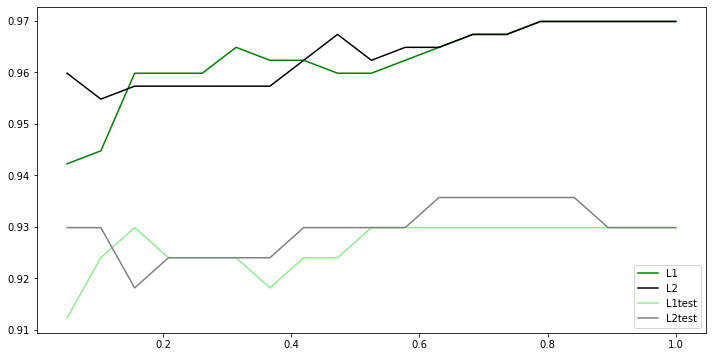

In [31]:
# 学习曲线
l1, l2, l1test , l2test =[], [], [], []
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.data, data.target, test_size = 0.3, random_state = 420)
for i in np.linspace(0.05,1,19):
    lrl1 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = i, max_iter = 1000 );
    lrl2 = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = i, max_iter = 1000 );
    lrl1 = lrl1.fit(Xtrain, Ytrain);
    lrl2 = lrl2.fit(Xtrain, Ytrain);
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain));
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest));
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain));
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest));
graph = [l1,l2,l1test,l2test];
color = ['green', 'black', 'lightgreen', 'gray'];
label = ['L1','L2',"L1test","L2test"];
plt.figure(figsize = (12,6));
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i], color[i], label = label[i]);
plt.legend(loc = 4);
plt.show()

### 逻辑回归的特征工程

In [32]:
from sklearn.linear_model import LogisticRegression 
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel


In [33]:
data = load_breast_cancer()

In [41]:
LR = LogisticRegression(C = 0.8, solver = 'liblinear',  random_state = 420);
cross_val_score(LR,data.data, data.target, cv = 10).mean()

0.9508145363408522

In [42]:

X_embedded = SelectFromModel(LR,norm_order=1).fit_transform(data.data,data.target);

In [43]:
X_embedded.shape

(569, 9)

In [44]:
cross_val_score(LR,X_embedded, data.target, cv = 10).mean()

0.9368107769423559

(0.0, 30)
(0.10079617466316373, 17)
(0.20159234932632747, 12)
(0.30238852398949123, 10)
(0.40318469865265494, 8)
(0.5039808733158186, 8)
(0.6047770479789825, 5)
(0.7055732226421462, 5)
(0.8063693973053099, 5)
(0.9071655719684736, 5)
(1.0079617466316373, 5)
(1.108757921294801, 3)
(1.209554095957965, 3)
(1.3103502706211285, 2)
(1.4111464452842923, 2)
(1.511942619947456, 1)
(1.6127387946106198, 1)
(1.7135349692737836, 1)
(1.8143311439369472, 1)
(1.915127318600111, 1)


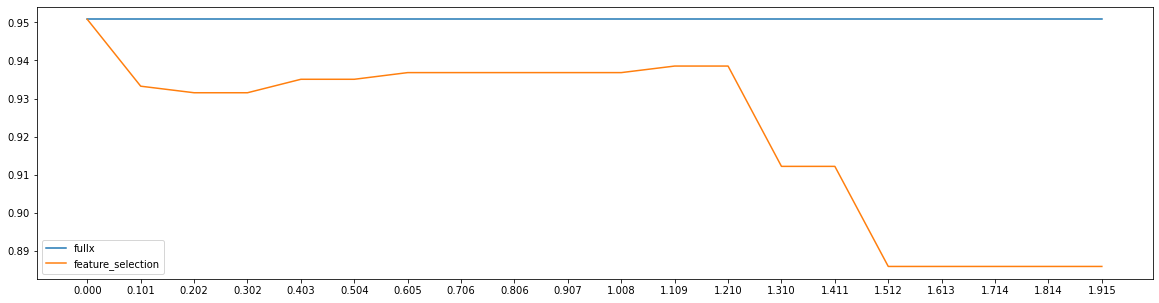

In [47]:
# 模型的两种调节方式： 1）调节 threshold 
fullx = [];
fsx = [];
k = 0;
threshold = np.linspace(0,abs(LR.fit(data.data,data.target).coef_).max(),20);
for i in threshold:
    X_embedded = SelectFromModel(LR,threshold = i).fit_transform(data.data, data.target);
    fullx.append(cross_val_score(LR,data.data,data.target,cv = 10).mean());
    fsx.append(cross_val_score(LR,X_embedded,data.target,cv=10).mean());
    print((threshold[k],X_embedded.shape[1]));
    k += 1;
plt.figure(figsize = (20,5));
plt.plot(threshold, fullx, label = 'fullx');
plt.plot(threshold, fsx, label = 'feature_selection');
plt.xticks(threshold);
plt.legend();
plt.show()

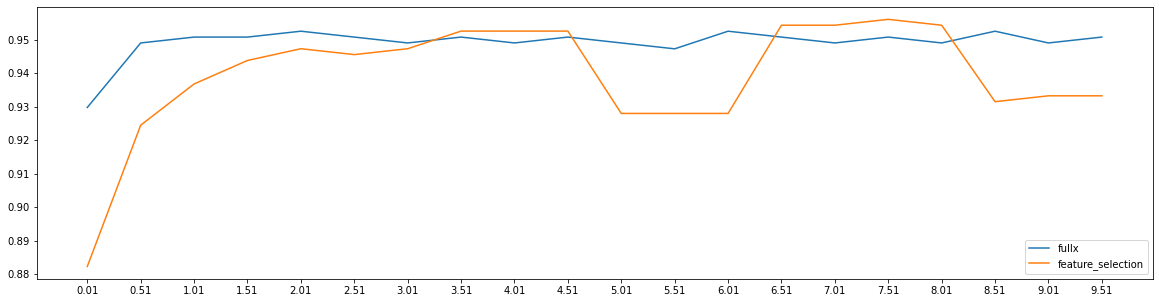

In [50]:
# 第二种 ： 调节逻辑回归的类LR_， 调节C 
fullx = [];
fsx = [];
C = np.arange(0.01,10.01,0.5)
for i in C:
    LR = LogisticRegression(solver = 'liblinear', random_state = 420, C = i);
    X_embedded = SelectFromModel(LR, norm_order = 1).fit_transform(data.data, data.target);
    fsx.append(cross_val_score(LR,X_embedded,data.target,cv = 10).mean());
    fullx.append(cross_val_score(LR,data.data, data.target,cv = 10).mean());

plt.figure(figsize = (20,5));
plt.plot(C, fullx, label = 'fullx');
plt.plot(C, fsx, label = 'feature_selection');
plt.xticks(C);
plt.legend();
plt.show()

In [51]:
print(max(fsx),C[fsx.index(max(fsx))])

0.9561090225563911 7.51


0.9561090225563911 6.029999999999999


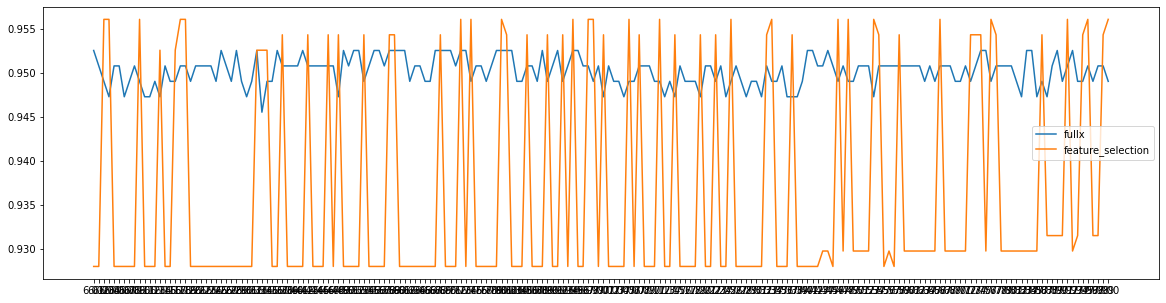

In [52]:
# 第二种 ： 调节逻辑回归的类LR_， 调节C 
fullx = [];
fsx = [];
C = np.arange(6.01,8.01,0.01)
for i in C:
    LR = LogisticRegression(solver = 'liblinear', random_state = 420, C = i);
    X_embedded = SelectFromModel(LR, norm_order = 1).fit_transform(data.data, data.target);  # norm_order = 1 为L1范式
    fsx.append(cross_val_score(LR,X_embedded,data.target,cv = 10).mean());
    fullx.append(cross_val_score(LR,data.data, data.target,cv = 10).mean());
print(max(fsx),C[fsx.index(max(fsx))])
plt.figure(figsize = (20,5));
plt.plot(C, fullx, label = 'fullx');
plt.plot(C, fsx, label = 'feature_selection');
plt.xticks(C);
plt.legend();
plt.show()

In [53]:
data.data.shape

(569, 30)

In [56]:
X_embedded.shape

(569, 9)

### 梯度下降参数 max_iter